In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import timeit
import re
import json
import pickle
import fastparquet
import os
os.chdir('/mnt/t48/bighomes-active/sfeng/patentdiffusion/')
seed = 3
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import datetime
import logging

In [3]:
rs = fastparquet.ParquetFile("DataStore/2018-10/Reg0930/naics_name_all_1003.parq").to_pandas()
print(rs.columns)

Index(['tp', 'op', 'sim_docvecs', 'sim_ldavecs', 'tp_gyear', 'tp_naics_name',
       'tp_primclass', 'tp_inv_msa', 'op_naics_name', 'op_primclass',
       'op_inv_msa', 'inv_msa_match', 'primclass_match', 'norm_sim_ldavecs',
       'norm_sim_docvecs', 'mean_sim_ldavecs_pc_msa_v',
       'mean_sim_docvecs_pc_msa_v', 'mean_sim_docvecs_pc_v',
       'mean_sim_ldavecs_pc_v', 'norm_mean_sim_ldavecs_pc_msa_v',
       'norm_mean_sim_docvecs_pc_msa_v', 'norm_mean_sim_docvecs_pc_v',
       'norm_mean_sim_ldavecs_pc_v', 'year_group', 'common_est_inv',
       'common_pat_inv', 'lawyer_match', 'num_common_cited',
       'norm_num_common_cited', 'tp_pct_common_cited',
       'norm_tp_pct_common_cited', 'common_cited_match', 'mean_sim_docvecs_pc',
       'mean_sim_ldavecs_pc', 'mean_sim_docvecs_pc_msa',
       'mean_sim_ldavecs_pc_msa', 'sd_sim_docvecs_pc', 'sd_sim_ldavecs_pc',
       'sd_sim_docvecs_pc_msa', 'sd_sim_ldavecs_pc_msa',
       'norm_mean_sim_ldavecs_pc', 'norm_mean_sim_docvecs_pc',
   

In [4]:
display(np.round(rs[["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "sim_docvecs"]].describe(),3))
display(np.round(rs[["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "mean_sim_docvecs_pc_v",
                     "mean_sim_docvecs_pc_msa_v", "sim_docvecs", "inv_msa_match"]].corr(),3))

display(np.round(rs.loc[rs["inv_msa_match"] == True, ["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "mean_sim_docvecs_pc_v",
                     "mean_sim_docvecs_pc_msa_v", "sim_docvecs"]].describe(),3))
display(np.round(rs.loc[rs["inv_msa_match"] == False, ["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "mean_sim_docvecs_pc_v",
                     "mean_sim_docvecs_pc_msa_v", "sim_docvecs"]].describe(),3))

display(np.round(rs.loc[rs["inv_msa_match"] == True, ["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "mean_sim_docvecs_pc_v",
                     "mean_sim_docvecs_pc_msa_v", "sim_docvecs"]].corr(),3))
display(np.round(rs.loc[rs["inv_msa_match"] == False, ["mean_sim_docvecs_pc", "mean_sim_docvecs_pc_msa", "mean_sim_docvecs_pc_v",
                     "mean_sim_docvecs_pc_msa_v", "sim_docvecs"]].corr(),3))

,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,sim_docvecs
count,1407451.000,1221033.000,1481000.000
mean,0.128,0.132,0.131
std,0.047,0.069,0.135
min,-0.208,-0.564,-0.416
25%,0.096,0.092,0.039
50%,0.117,0.123,0.123
75%,0.150,0.166,0.213
max,0.371,1.000,0.679


,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,mean_sim_docvecs_pc_v,mean_sim_docvecs_pc_msa_v,sim_docvecs,inv_msa_match
mean_sim_docvecs_pc,1.000,0.701,0.831,0.663,0.330,0.031
mean_sim_docvecs_pc_msa,0.701,1.000,0.598,0.666,0.260,0.084
mean_sim_docvecs_pc_v,0.831,0.598,1.000,0.752,0.282,0.042
mean_sim_docvecs_pc_msa_v,0.663,0.666,0.752,1.000,0.252,0.187
sim_docvecs,0.330,0.260,0.282,0.252,1.000,0.023
inv_msa_match,0.031,0.084,0.042,0.187,0.023,1.000


,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,mean_sim_docvecs_pc_v,mean_sim_docvecs_pc_msa_v,sim_docvecs
count,345366.000,314200.000,345214.000,315116.000,362662.000
mean,0.131,0.142,0.678,0.577,0.136
std,0.048,0.074,0.203,0.277,0.136
min,-0.022,-0.564,0.037,-0.516,-0.416
25%,0.097,0.098,0.518,0.368,0.043
50%,0.119,0.130,0.651,0.551,0.128
75%,0.154,0.178,0.834,0.786,0.219
max,0.371,1.000,1.000,1.000,0.679


,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,mean_sim_docvecs_pc_v,mean_sim_docvecs_pc_msa_v,sim_docvecs
count,1062085.000,906833.000,1061555.000,906732.000,1118338.000
mean,0.128,0.129,0.658,0.472,0.129
std,0.046,0.067,0.198,0.228,0.134
min,-0.208,-0.484,0.016,-0.647,-0.416
25%,0.096,0.090,0.504,0.306,0.037
50%,0.117,0.121,0.629,0.456,0.121
75%,0.148,0.162,0.805,0.628,0.211
max,0.371,0.775,1.000,0.996,0.679


,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,mean_sim_docvecs_pc_v,mean_sim_docvecs_pc_msa_v,sim_docvecs
mean_sim_docvecs_pc,1.000,0.744,0.831,0.724,0.344
mean_sim_docvecs_pc_msa,0.744,1.000,0.671,0.700,0.284
mean_sim_docvecs_pc_v,0.831,0.671,1.000,0.863,0.303
mean_sim_docvecs_pc_msa_v,0.724,0.700,0.863,1.000,0.279
sim_docvecs,0.344,0.284,0.303,0.279,1.000


,mean_sim_docvecs_pc,mean_sim_docvecs_pc_msa,mean_sim_docvecs_pc_v,mean_sim_docvecs_pc_msa_v,sim_docvecs
mean_sim_docvecs_pc,1.000,0.685,0.830,0.647,0.324
mean_sim_docvecs_pc_msa,0.685,1.000,0.569,0.649,0.249
mean_sim_docvecs_pc_v,0.830,0.569,1.000,0.715,0.275
mean_sim_docvecs_pc_msa_v,0.647,0.649,0.715,1.000,0.241
sim_docvecs,0.324,0.249,0.275,0.241,1.000


In [5]:
del(rs)

## Plots

### Distributions

In [11]:
ns = fastparquet.ParquetFile("DataStore/2018-10/Reg0930/naics_name_all_1004.parq").to_pandas()
ps = fastparquet.ParquetFile("DataStore/2018-10/Reg0930/primclass_all_1004.parq").to_pandas()

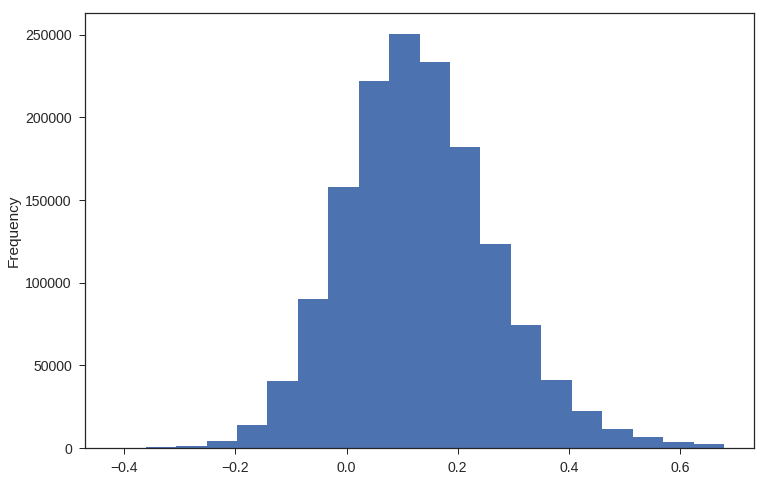

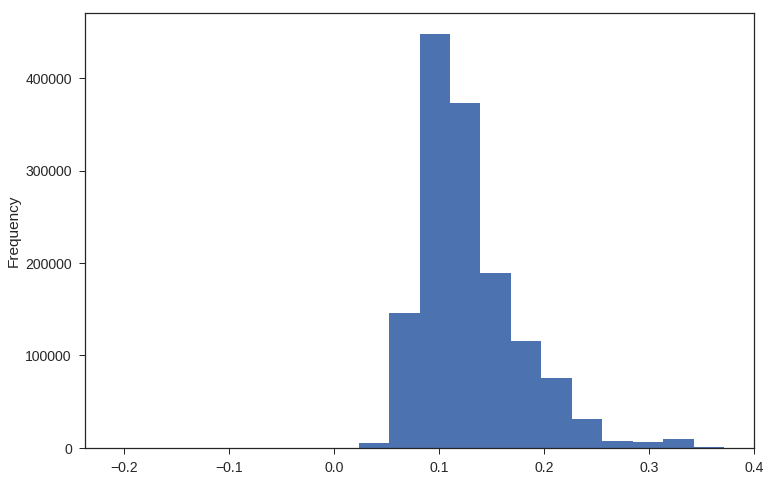

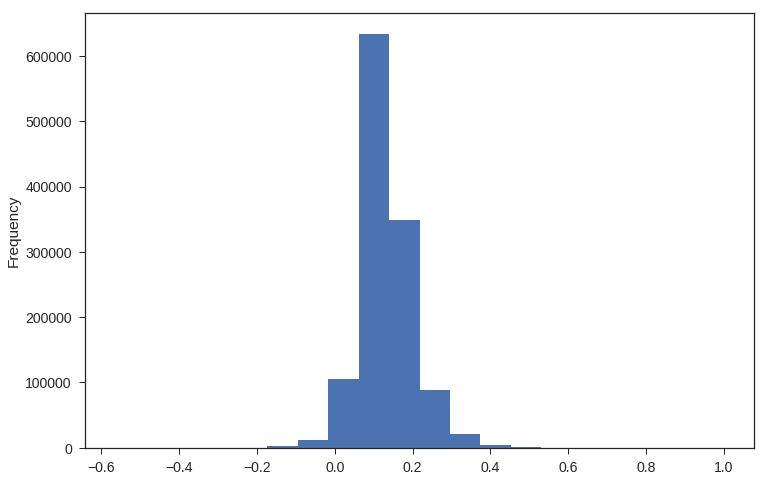

In [27]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
ns["sim_docvecs"].plot.hist(bins=20,ax=ax)
plt.show()

# %matplotlib inline
# fig, ax = plt.subplots(figsize=(12,8))
# ns["sim_mean_docvecs_tp_pc"].plot.hist(bins=20)
# plt.show()

# fig, ax = plt.subplots(figsize=(12,8))
# ns["sim_mean_docvecs_tp_pc_msa"].plot.hist(bins=20)
# plt.show()

fig, ax = plt.subplots(figsize=(12,8))
ns["mean_sim_docvecs_pc"].plot.hist(bins=20)
plt.show()

fig, ax = plt.subplots(figsize=(12,8))
ns["mean_sim_docvecs_pc_msa"].plot.hist(bins=20)
plt.show()

# Distributions

In [12]:
import math
def round_up(x, a):
    try:
        r = int(math.ceil(x / a)) * a
    except Exception:
        r = np.nan
    return r

ns["bin_norm_pc"] = ns["norm_mean_sim_docvecs_pc"].apply(lambda x: round_up(x,0.5))
ns["bin_norm_pc_msa"] = ns["norm_mean_sim_docvecs_pc_msa"].apply(lambda x: round_up(x,0.5))
ns["bin_pc"] = ns["norm_mean_sim_docvecs_pc"].apply(lambda x: round_up(x,0.1))
ns["bin_pc_msa"] = ns["norm_mean_sim_docvecs_pc_msa"].apply(lambda x: round_up(x,0.1))

# Bin SD greater than 3.5 or less than -3.5
for c in ["bin_norm_pc", "bin_norm_pc_msa"]:
    ns.loc[ns[c] >= 3.5, c] = 3.5
    ns.loc[ns[c] <= -2.5, c] = -2.5
    
for c in ["bin_pc", "bin_pc_msa"]:
    ns.loc[ns[c] >= 0.6, c] = 0.6
    ns.loc[ns[c] <= -0.1, c] = -0.1    

In [13]:
ps["bin_norm_pc_msa"] = ps["norm_mean_sim_docvecs_pc_msa"].apply(lambda x: round_up(x,0.5))
ps["bin_pc_msa"] = ps["norm_mean_sim_docvecs_pc_msa"].apply(lambda x: round_up(x,0.1))

# Bin SD greater than 3.5 or less than -3.5
for c in ["bin_norm_pc_msa"]:
    ps.loc[ps[c] >= 3.5, c] = 3.5
    ps.loc[ps[c] <= -2.5, c] = -2.5
    
for c in ["bin_pc_msa"]:
    ns.loc[ns[c] >= 0.6, c] = 0.6
    ns.loc[ns[c] <= -0.1, c] = -0.1    

In [14]:
# %matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
plt.rcParams["font.family"] = "Liberation Sans"
plt.rcParams.update({'font.size': 20})
savepath = "DataStore/2018-10/ResultsGraphs/"
def p1(x, y, hue, data, bars, order, ax): 
    g = sns.pointplot(x = x, y = y, hue = hue, 
                data = data, ci = bars, markers = ".", 
                order = order, dodge = True, errwidth = 1,
                palette = sns.color_palette("Greys_r", 3),
                n_boot = 100,      
                  ax = ax)
    sns.despine()
    return g

    
def p2(x, y, data, order, ax, conf_int = None):
    g = sns.pointplot(x=x, y=y, data = data, ci = conf_int, join = True,
                 order = order, markers = ".", color="grey", ax = ax)
    sns.despine()
    return g
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))

### 1. NAICS Conditional Means

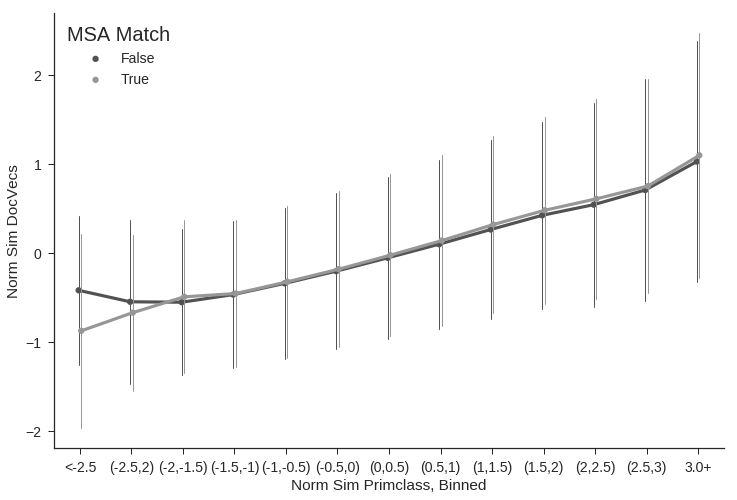

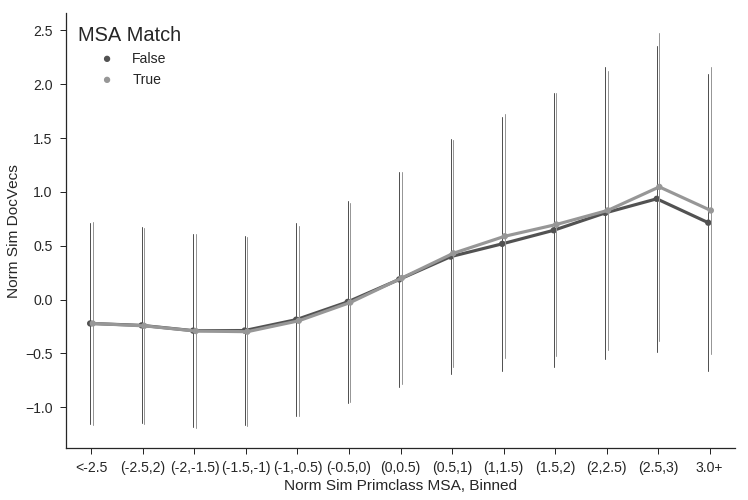

In [31]:
x1 = "bin_norm_pc"
y1 = "norm_sim_docvecs"
hue1 = "inv_msa_match"
df = ns
order1 = None
conf_int1 = "sd"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper left', title = c_dict[hue1])
ax.set_xticklabels(c_dict["x_labels"][x1])
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"3b-N-SimPC-Mean.png")
plt.show()
del(fig, ax)

x1 = "bin_norm_pc_msa"
y1 = "norm_sim_docvecs"
hue1 = "inv_msa_match"
df = ns
order1 = None
conf_int1 = "sd"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper left', title = c_dict[hue1])
ax.set_xticklabels(c_dict["x_labels"][x1])
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"3b-N-MSASimPC-Mean.png")
plt.show()
del(fig, ax)

# x1 = "bin_pc"
# y1 = "sim_docvecs"
# hue1 = "inv_msa_match"
# df = ns
# order1 = None
# conf_int1 = "sd"
# fig, ax = plt.subplots(figsize=(12,8))
# g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
# g3.legend(loc='upper left', title = c_dict[hue1])
# ax.set_xticklabels(c_dict["x_labels"][x1])
# ax.set_xlabel(c_dict[x1])
# ax.set_ylabel(c_dict[y1])
# # plt.savefig(savepath+"3b-MSASimPC-Mean.png")
# plt.show()
# del(fig, ax)

# x1 = "bin_pc_msa"
# y1 = "sim_docvecs"
# hue1 = "inv_msa_match"
# df = ns
# order1 = None
# conf_int1 = "sd"
# fig, ax = plt.subplots(figsize=(12,8))
# g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
# g3.legend(loc='upper left', title = c_dict[hue1])
# ax.set_xticklabels(c_dict["x_labels"][x1])
# ax.set_xlabel(c_dict[x1])
# ax.set_ylabel(c_dict[y1])
# # plt.savefig(savepath+"3b-MSASimPC-Mean.png")
# plt.show()
# del(fig, ax)



### 2. Primclass Sample

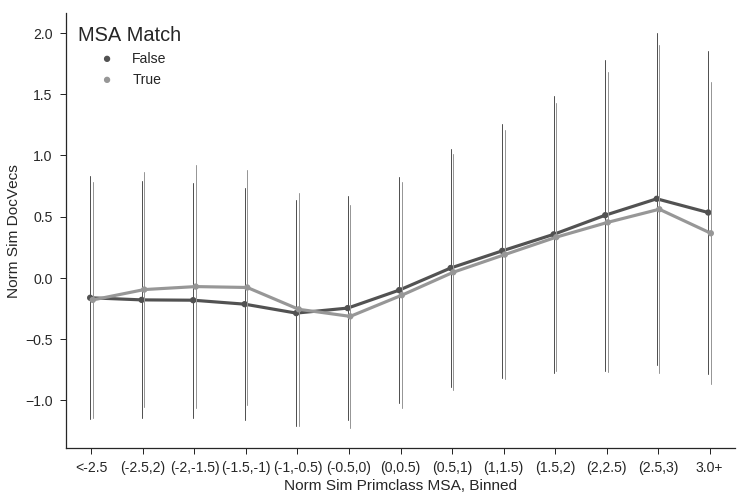

In [29]:
x1 = "bin_norm_pc_msa"
y1 = "norm_sim_docvecs"
hue1 = "inv_msa_match"
df = ps
order1 = None
conf_int1 = "sd"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper left', title = c_dict[hue1])
ax.set_xticklabels(c_dict["x_labels"][x1])
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"3b-PC-MSASimPC-Mean.png")
plt.show()
del(fig, ax)

## Tables: Differences in conditional means

### 1. NAICS
#### Sim PC

In [36]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dm = "norm_sim_docvecs"
binv = "bin_norm_pc"

# By year group
nt = ns.loc[(ns["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])
nf = ns.loc[(ns["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) if n in nf.groups.keys() else np.nan for n,g in nt]
match_f_size = [len(nf.get_group(n)[dm])  if n in nf.groups.keys() else np.nan for n,g in nt]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0]\
      if n in nf.groups.keys() else np.nan for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1]\
      if n in nf.groups.keys() else np.nan for n,g in nt]

cm = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   "MSA Match = T, $N$": match_t_size,
                  c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "MSA Match = F, $N$": match_f_size,
                   "Diff in Mean": diff,
                   "$t$-value": t,
                   "$p$-value": p,
                   "year_group": [i[1] for i in nt.groups.keys()],
                   c_dict[binv]: [i[0] for i in nt.groups.keys()]
                  })

# All
nt = ns.loc[(ns["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])
nf = ns.loc[(ns["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) for n,g in nf]
match_f_size = [len(nf.get_group(n)[dm]) for n,g in nf]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0] for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1] for n,g in nt]

cm_all = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "$t$-value": t,
                   "$p$-value": p,
                   "Diff in Mean": diff,
                   "MSA Match = T, $N$": match_t_size,
                   "MSA Match = F, $N$": match_f_size,
                   "year_group": "All",
                   c_dict[binv]:  list(nt.groups.keys())
                  })

cm = cm.append(cm_all, ignore_index=True)
cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]] = cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]].fillna(0)
cm_naics_p = cm

/homedir/eco/sfeng/bigdata/python/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/homedir/eco/sfeng/bigdata/python/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
for n,g in cm_naics_p.groupby("year_group"):
    print(n, "\n")
    g2 = np.round(g,3)
    g2["MSA Match = T, $N$"] = g2["MSA Match = T, $N$"].astype(int)
    g2["MSA Match = F, $N$"] = g2["MSA Match = F, $N$"].astype(int)
    # Replace with - if p-value is null
    cols = g2.columns.tolist()
    cols.remove(c_dict[binv])
    g2.loc[g2["$p$-value"].isnull(), cols] = "-"
    g2 = g2.set_index(c_dict[binv]).drop("year_group",1)
    # Reverse columns
    g2 = g2[g2.columns.tolist()[::-1]]
    g2 = g2.T
    
    display(np.round(g2,3))
    print(np.round(g2,3).to_latex(index=False, escape=False))

1975-85 



"Norm Sim Primclass, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-,0.308,-0.464,-0.481,-0.357,-0.211,-0.087,0.091,0.234,0.443,0.664,0.719,0.969
"Norm Sim DocVecs, MSA Match = F, Mean",-,-0.469,-0.57,-0.493,-0.374,-0.247,-0.102,0.052,0.247,0.393,0.53,0.758,0.815
"MSA Match = T, $N$",-,2,69,1099,4328,5999,4326,2749,1708,1366,1055,952,443
"MSA Match = F, $N$",-,5,181,3283,14099,19532,14358,9413,5620,4449,3340,2881,1133
Diff in Mean,-,0.777,0.106,0.012,0.016,0.036,0.015,0.039,-0.013,0.049,0.134,-0.039,0.154
$t$-value,-,0.602,0.93,0.4,1.106,2.821,0.972,1.851,-0.438,1.458,3.25,-0.82,1.966
$p$-value,-,0.627,0.354,0.689,0.269,0.005,0.331,0.064,0.662,0.145,0.001,0.413,0.05


\begin{tabular}{lllllllllllll}
\toprule
-2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
   - &  0.308 & -0.464 & -0.481 & -0.357 & -0.211 & -0.087 &  0.091 &  0.234 &  0.443 &  0.664 &  0.719 &  0.969 \\
   - & -0.469 &  -0.57 & -0.493 & -0.374 & -0.247 & -0.102 &  0.052 &  0.247 &  0.393 &   0.53 &  0.758 &  0.815 \\
   - &      2 &     69 &   1099 &   4328 &   5999 &   4326 &   2749 &   1708 &   1366 &   1055 &    952 &    443 \\
   - &      5 &    181 &   3283 &  14099 &  19532 &  14358 &   9413 &   5620 &   4449 &   3340 &   2881 &   1133 \\
   - &  0.777 &  0.106 &  0.012 &  0.016 &  0.036 &  0.015 &  0.039 & -0.013 &  0.049 &  0.134 & -0.039 &  0.154 \\
   - &  0.602 &   0.93 &    0.4 &  1.106 &  2.821 &  0.972 &  1.851 & -0.438 &  1.458 &   3.25 &  -0.82 &  1.966 \\
   - &  0.627 &  0.354 &  0.689 &  0.269 &  0.005 &  0.331 &  0.064 &  0.662 &  0.145 &  0.001 &  0.413 &   0.05 \\
\bottomrule
\end{tabula

"Norm Sim Primclass, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-1.665,-0.548,-0.517,-0.476,-0.344,-0.206,-0.059,0.126,0.306,0.452,0.59,0.725,1.012
"Norm Sim DocVecs, MSA Match = F, Mean",-0.442,-0.661,-0.571,-0.493,-0.369,-0.235,-0.085,0.086,0.231,0.396,0.526,0.664,0.895
"MSA Match = T, $N$",2,17,188,3771,12932,16951,10646,7524,4622,3636,2847,2007,1605
"MSA Match = F, $N$",11,34,587,11936,42904,56344,34827,24728,14214,10674,7968,5845,4394
Diff in Mean,-1.223,0.113,0.054,0.017,0.025,0.029,0.026,0.04,0.076,0.057,0.064,0.061,0.117
$t$-value,-0.886,0.431,0.735,1.09,3.017,3.869,2.665,3.095,4.37,2.753,2.609,1.893,2.92
$p$-value,0.53,0.669,0.463,0.276,0.003,0,0.008,0.002,0,0.006,0.009,0.058,0.004


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-1.665 & -0.548 & -0.517 & -0.476 & -0.344 & -0.206 & -0.059 &  0.126 &  0.306 &  0.452 &   0.59 &  0.725 &  1.012 \\
-0.442 & -0.661 & -0.571 & -0.493 & -0.369 & -0.235 & -0.085 &  0.086 &  0.231 &  0.396 &  0.526 &  0.664 &  0.895 \\
     2 &     17 &    188 &   3771 &  12932 &  16951 &  10646 &   7524 &   4622 &   3636 &   2847 &   2007 &   1605 \\
    11 &     34 &    587 &  11936 &  42904 &  56344 &  34827 &  24728 &  14214 &  10674 &   7968 &   5845 &   4394 \\
-1.223 &  0.113 &  0.054 &  0.017 &  0.025 &  0.029 &  0.026 &   0.04 &  0.076 &  0.057 &  0.064 &  0.061 &  0.117 \\
-0.886 &  0.431 &  0.735 &   1.09 &  3.017 &  3.869 &  2.665 &  3.095 &   4.37 &  2.753 &  2.609 &  1.893 &   2.92 \\
  0.53 &  0.669 &  0.463 &  0.276 &  0.003 &      0 &  0.008 &  0.002 &      0 &  0.006 &  0.009 &  0.058 &  0.004 \\
\bottom

"Norm Sim Primclass, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.241,-1.127,-0.429,-0.455,-0.323,-0.181,-0.022,0.161,0.354,0.512,0.63,0.737,1.092
"Norm Sim DocVecs, MSA Match = F, Mean",-0.774,-0.611,-0.543,-0.454,-0.334,-0.208,-0.053,0.104,0.278,0.46,0.572,0.693,1.073
"MSA Match = T, $N$",2,9,183,4847,20904,27291,16317,12116,6895,6680,6375,2836,2339
"MSA Match = F, $N$",3,24,597,16912,68533,88746,50957,35968,19545,18740,16873,7635,6339
Diff in Mean,0.533,-0.516,0.114,-0.002,0.011,0.027,0.031,0.057,0.076,0.052,0.058,0.045,0.019
$t$-value,1.156,-1.98,1.634,-0.137,1.719,4.608,3.823,5.683,5.359,3.461,3.437,1.728,0.602
$p$-value,0.332,0.065,0.103,0.891,0.086,0,0,0,0,0.001,0.001,0.084,0.547


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.241 & -1.127 & -0.429 & -0.455 & -0.323 & -0.181 & -0.022 &  0.161 &  0.354 &  0.512 &   0.63 &  0.737 &  1.092 \\
-0.774 & -0.611 & -0.543 & -0.454 & -0.334 & -0.208 & -0.053 &  0.104 &  0.278 &   0.46 &  0.572 &  0.693 &  1.073 \\
     2 &      9 &    183 &   4847 &  20904 &  27291 &  16317 &  12116 &   6895 &   6680 &   6375 &   2836 &   2339 \\
     3 &     24 &    597 &  16912 &  68533 &  88746 &  50957 &  35968 &  19545 &  18740 &  16873 &   7635 &   6339 \\
 0.533 & -0.516 &  0.114 & -0.002 &  0.011 &  0.027 &  0.031 &  0.057 &  0.076 &  0.052 &  0.058 &  0.045 &  0.019 \\
 1.156 &  -1.98 &  1.634 & -0.137 &  1.719 &  4.608 &  3.823 &  5.683 &  5.359 &  3.461 &  3.437 &  1.728 &  0.602 \\
 0.332 &  0.065 &  0.103 &  0.891 &  0.086 &      0 &      0 &      0 &      0 &  0.001 &  0.001 &  0.084 &  0.547 \\
\bottom

"Norm Sim Primclass, Binned",-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-,-0.726,-0.351,-0.281,-0.161,-0.006,0.141,0.319,0.476,0.59,0.784,1.149
"Norm Sim DocVecs, MSA Match = F, Mean",-,-0.483,-0.412,-0.302,-0.173,-0.037,0.111,0.274,0.416,0.528,0.735,1.077
"MSA Match = T, $N$",-,35,1140,10487,32703,37961,22223,13956,9851,6688,4126,4135
"MSA Match = F, $N$",-,139,3732,35391,105699,114497,64342,38322,26017,17400,9329,11044
Diff in Mean,-,-0.243,0.061,0.021,0.012,0.031,0.03,0.046,0.06,0.062,0.049,0.072
$t$-value,-,-1.413,2.049,2.13,2.154,5.725,4.044,4.757,4.927,3.897,2.197,2.819
$p$-value,-,0.164,0.041,0.033,0.031,0,0,0,0,0,0.028,0.005


\begin{tabular}{llllllllllll}
\toprule
-2.0 &   -1.5 &   -1.0 &   -0.5 &     0.0 &     0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
   - & -0.726 & -0.351 & -0.281 &  -0.161 &  -0.006 &  0.141 &  0.319 &  0.476 &   0.59 &  0.784 &  1.149 \\
   - & -0.483 & -0.412 & -0.302 &  -0.173 &  -0.037 &  0.111 &  0.274 &  0.416 &  0.528 &  0.735 &  1.077 \\
   - &     35 &   1140 &  10487 &   32703 &   37961 &  22223 &  13956 &   9851 &   6688 &   4126 &   4135 \\
   - &    139 &   3732 &  35391 &  105699 &  114497 &  64342 &  38322 &  26017 &  17400 &   9329 &  11044 \\
   - & -0.243 &  0.061 &  0.021 &   0.012 &   0.031 &   0.03 &  0.046 &   0.06 &  0.062 &  0.049 &  0.072 \\
   - & -1.413 &  2.049 &   2.13 &   2.154 &   5.725 &  4.044 &  4.757 &  4.927 &  3.897 &  2.197 &  2.819 \\
   - &  0.164 &  0.041 &  0.033 &   0.031 &       0 &      0 &      0 &      0 &      0 &  0.028 &  0.005 \\
\bottomrule
\end{tabular}

All 



"Norm Sim Primclass, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.873,-0.669,-0.491,-0.454,-0.322,-0.18,-0.023,0.141,0.321,0.481,0.61,0.753,1.098
"Norm Sim DocVecs, MSA Match = F, Mean",-0.418,-0.547,-0.552,-0.466,-0.34,-0.203,-0.053,0.1,0.265,0.424,0.544,0.709,1.028
"MSA Match = T, $N$",5,29,475,10857,48651,82944,69250,44612,27181,21533,16965,9921,8522
"MSA Match = F, $N$",25,77,1504,35863,160927,270321,214639,134451,77701,59880,45581,25690,22910
Diff in Mean,-0.455,-0.122,0.061,0.012,0.017,0.023,0.03,0.04,0.056,0.057,0.066,0.044,0.07
$t$-value,-0.796,-0.622,1.361,1.284,3.966,6.515,7.569,7.708,7.911,6.789,6.454,3.059,4.03
$p$-value,0.464,0.537,0.174,0.199,0,0,0,0,0,0,0,0.002,0


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &    -0.5 &     0.0 &     0.5 &     1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.873 & -0.669 & -0.491 & -0.454 &  -0.322 &   -0.18 &  -0.023 &   0.141 &  0.321 &  0.481 &   0.61 &  0.753 &  1.098 \\
-0.418 & -0.547 & -0.552 & -0.466 &   -0.34 &  -0.203 &  -0.053 &     0.1 &  0.265 &  0.424 &  0.544 &  0.709 &  1.028 \\
     5 &     29 &    475 &  10857 &   48651 &   82944 &   69250 &   44612 &  27181 &  21533 &  16965 &   9921 &   8522 \\
    25 &     77 &   1504 &  35863 &  160927 &  270321 &  214639 &  134451 &  77701 &  59880 &  45581 &  25690 &  22910 \\
-0.455 & -0.122 &  0.061 &  0.012 &   0.017 &   0.023 &    0.03 &    0.04 &  0.056 &  0.057 &  0.066 &  0.044 &   0.07 \\
-0.796 & -0.622 &  1.361 &  1.284 &   3.966 &   6.515 &   7.569 &   7.708 &  7.911 &  6.789 &  6.454 &  3.059 &   4.03 \\
 0.464 &  0.537 &  0.174 &  0.199 &       0 &       0 &       0 &       0 &      0 &      0 &    

#### Sim PC MSA

In [42]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dm = "norm_sim_docvecs"
binv = "bin_norm_pc_msa"

# By year group
nt = ns.loc[(ns["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])
nf = ns.loc[(ns["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) if n in nf.groups.keys() else np.nan for n,g in nt]
match_f_size = [len(nf.get_group(n)[dm])  if n in nf.groups.keys() else np.nan for n,g in nt]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0]\
      if n in nf.groups.keys() else np.nan for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1]\
      if n in nf.groups.keys() else np.nan for n,g in nt]

cm = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   "MSA Match = T, $N$": match_t_size,
                  c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "MSA Match = F, $N$": match_f_size,
                   "Diff in Mean": diff,
                   "$t$-value": t,
                   "$p$-value": p,
                   "year_group": [i[1] for i in nt.groups.keys()],
                   c_dict[binv]: [i[0] for i in nt.groups.keys()]
                  })

# All
nt = ns.loc[(ns["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])
nf = ns.loc[(ns["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) for n,g in nf]
match_f_size = [len(nf.get_group(n)[dm]) for n,g in nf]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0] for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1] for n,g in nt]

cm_all = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "$t$-value": t,
                   "$p$-value": p,
                   "Diff in Mean": diff,
                   "MSA Match = T, $N$": match_t_size,
                   "MSA Match = F, $N$": match_f_size,
                   "year_group": "All",
                   c_dict[binv]:  list(nt.groups.keys())
                  })

cm = cm.append(cm_all, ignore_index=True)
cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]] = cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]].fillna(0)
cm_naics_pm = cm

In [44]:
print(nt.get_group(3)[dm].mean()-nt.get_group(3.5)[dm].mean())
print(sp.stats.ttest_ind(nt.get_group(3)[dm], nt.get_group(3.5)[dm], equal_var=False, nan_policy="omit"))
print(nf.get_group(3)[dm].mean()-nf.get_group(3.5)[dm].mean())
print(sp.stats.ttest_ind(nt.get_group(3)[dm], nt.get_group(3.5)[dm], equal_var=False, nan_policy="omit"))

0.2186660775031033
Ttest_indResult(statistic=5.526573987147495, pvalue=3.435295432963573e-08)
0.22132178220851473
Ttest_indResult(statistic=5.526573987147495, pvalue=3.435295432963573e-08)


In [20]:
for n,g in cm_naics_pm.groupby("year_group"):
    print(n, "\n")
    g2 = np.round(g,3)
    g2["MSA Match = T, $N$"] = g2["MSA Match = T, $N$"].astype(int)
    g2["MSA Match = F, $N$"] = g2["MSA Match = F, $N$"].astype(int)
    # Replace with - if p-value is null
    cols = g2.columns.tolist()
    cols.remove(c_dict[binv])
    g2.loc[g2["$p$-value"].isnull(), cols] = "-"
    g2 = g2.set_index(c_dict[binv]).drop("year_group",1)
    # Reverse columns
    g2 = g2[g2.columns.tolist()[::-1]]
    g2 = g2.T
    
    display(np.round(g2,3))
    print(np.round(g2,3).to_latex(index=False, escape=False))

1975-85 



"Norm Sim Primclass MSA, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.281,-0.261,-0.3,-0.287,-0.242,-0.08,0.101,0.372,0.583,0.555,0.609,0.661,0.557
"Norm Sim DocVecs, MSA Match = F, Mean",-0.246,-0.282,-0.294,-0.313,-0.215,-0.07,0.113,0.33,0.464,0.54,0.584,0.521,0.498
"MSA Match = T, $N$",152,233,682,2316,5268,4841,2766,2081,1235,497,280,121,171
"MSA Match = F, $N$",777,1001,2703,7784,14795,13530,8626,5259,2872,1312,615,263,301
Diff in Mean,-0.035,0.021,-0.006,0.026,-0.027,-0.011,-0.012,0.042,0.12,0.015,0.025,0.14,0.059
$t$-value,-0.422,0.3,-0.162,1.261,-1.906,-0.667,-0.515,1.449,2.917,0.238,0.263,1.044,0.48
$p$-value,0.673,0.765,0.871,0.207,0.057,0.505,0.607,0.147,0.004,0.812,0.793,0.297,0.631


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.281 & -0.261 &   -0.3 & -0.287 & -0.242 &  -0.08 &  0.101 &  0.372 &  0.583 &  0.555 &  0.609 &  0.661 &  0.557 \\
-0.246 & -0.282 & -0.294 & -0.313 & -0.215 &  -0.07 &  0.113 &   0.33 &  0.464 &   0.54 &  0.584 &  0.521 &  0.498 \\
   152 &    233 &    682 &   2316 &   5268 &   4841 &   2766 &   2081 &   1235 &    497 &    280 &    121 &    171 \\
   777 &   1001 &   2703 &   7784 &  14795 &  13530 &   8626 &   5259 &   2872 &   1312 &    615 &    263 &    301 \\
-0.035 &  0.021 & -0.006 &  0.026 & -0.027 & -0.011 & -0.012 &  0.042 &   0.12 &  0.015 &  0.025 &   0.14 &  0.059 \\
-0.422 &    0.3 & -0.162 &  1.261 & -1.906 & -0.667 & -0.515 &  1.449 &  2.917 &  0.238 &  0.263 &  1.044 &   0.48 \\
 0.673 &  0.765 &  0.871 &  0.207 &  0.057 &  0.505 &  0.607 &  0.147 &  0.004 &  0.812 &  0.793 &  0.297 &  0.631 \\
\bottom

"Norm Sim Primclass MSA, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.173,-0.283,-0.327,-0.325,-0.227,-0.093,0.137,0.364,0.52,0.62,0.774,0.678,0.647
"Norm Sim DocVecs, MSA Match = F, Mean",-0.254,-0.288,-0.332,-0.319,-0.216,-0.068,0.112,0.316,0.428,0.508,0.595,0.644,0.493
"MSA Match = T, $N$",513,647,1873,6858,14718,12504,8117,5743,3321,1650,902,345,510
"MSA Match = F, $N$",2094,2907,7772,23767,44178,37767,23631,13447,7019,3400,1617,741,731
Diff in Mean,0.081,0.005,0.005,-0.006,-0.011,-0.025,0.026,0.048,0.093,0.112,0.179,0.034,0.154
$t$-value,1.724,0.145,0.228,-0.521,-1.301,-2.628,1.987,2.777,3.837,3.008,3.277,0.412,2.113
$p$-value,0.085,0.885,0.82,0.602,0.193,0.009,0.047,0.005,0,0.003,0.001,0.68,0.035


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.173 & -0.283 & -0.327 & -0.325 & -0.227 & -0.093 &  0.137 &  0.364 &   0.52 &   0.62 &  0.774 &  0.678 &  0.647 \\
-0.254 & -0.288 & -0.332 & -0.319 & -0.216 & -0.068 &  0.112 &  0.316 &  0.428 &  0.508 &  0.595 &  0.644 &  0.493 \\
   513 &    647 &   1873 &   6858 &  14718 &  12504 &   8117 &   5743 &   3321 &   1650 &    902 &    345 &    510 \\
  2094 &   2907 &   7772 &  23767 &  44178 &  37767 &  23631 &  13447 &   7019 &   3400 &   1617 &    741 &    731 \\
 0.081 &  0.005 &  0.005 & -0.006 & -0.011 & -0.025 &  0.026 &  0.048 &  0.093 &  0.112 &  0.179 &  0.034 &  0.154 \\
 1.724 &  0.145 &  0.228 & -0.521 & -1.301 & -2.628 &  1.987 &  2.777 &  3.837 &  3.008 &  3.277 &  0.412 &  2.113 \\
 0.085 &  0.885 &   0.82 &  0.602 &  0.193 &  0.009 &  0.047 &  0.005 &      0 &  0.003 &  0.001 &   0.68 &  0.035 \\
\bottom

"Norm Sim Primclass MSA, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.284,-0.285,-0.309,-0.329,-0.218,-0.052,0.206,0.465,0.587,0.705,0.847,0.865,0.723
"Norm Sim DocVecs, MSA Match = F, Mean",-0.233,-0.259,-0.315,-0.313,-0.214,-0.04,0.188,0.434,0.529,0.703,0.863,0.912,0.65
"MSA Match = T, $N$",529,691,2330,10309,26707,22082,14046,10426,5470,2308,1164,699,675
"MSA Match = F, $N$",2409,3270,9960,38010,84566,65685,37927,24037,10289,4791,2386,1091,870
Diff in Mean,-0.052,-0.026,0.006,-0.016,-0.004,-0.012,0.017,0.031,0.058,0.002,-0.016,-0.047,0.073
$t$-value,-1.209,-0.665,0.288,-1.642,-0.705,-1.719,1.775,2.487,3.033,0.054,-0.341,-0.691,1.094
$p$-value,0.227,0.506,0.773,0.101,0.481,0.086,0.076,0.013,0.002,0.957,0.733,0.489,0.274


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &    0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.284 & -0.285 & -0.309 & -0.329 & -0.218 & -0.052 &  0.206 &  0.465 &  0.587 &  0.705 &  0.847 &  0.865 &  0.723 \\
-0.233 & -0.259 & -0.315 & -0.313 & -0.214 &  -0.04 &  0.188 &  0.434 &  0.529 &  0.703 &  0.863 &  0.912 &   0.65 \\
   529 &    691 &   2330 &  10309 &  26707 &  22082 &  14046 &  10426 &   5470 &   2308 &   1164 &    699 &    675 \\
  2409 &   3270 &   9960 &  38010 &  84566 &  65685 &  37927 &  24037 &  10289 &   4791 &   2386 &   1091 &    870 \\
-0.052 & -0.026 &  0.006 & -0.016 & -0.004 & -0.012 &  0.017 &  0.031 &  0.058 &  0.002 & -0.016 & -0.047 &  0.073 \\
-1.209 & -0.665 &  0.288 & -1.642 & -0.705 & -1.719 &  1.775 &  2.487 &  3.033 &  0.054 & -0.341 & -0.691 &  1.094 \\
 0.227 &  0.506 &  0.773 &  0.101 &  0.481 &  0.086 &  0.076 &  0.013 &  0.002 &  0.957 &  0.733 &  0.489 &  0.274 \\
\bottom

"Norm Sim Primclass MSA, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.186,-0.141,-0.228,-0.228,-0.155,0.009,0.228,0.437,0.62,0.757,0.891,1.258,1.04
"Norm Sim DocVecs, MSA Match = F, Mean",-0.166,-0.148,-0.203,-0.216,-0.147,0.007,0.222,0.417,0.568,0.695,0.902,1.08,0.901
"MSA Match = T, $N$",451,551,1708,6669,29476,43873,24083,14257,6778,2834,1321,1398,964
"MSA Match = F, $N$",2014,2662,7181,26722,98964,123712,65157,30246,12503,5575,3346,2376,1482
Diff in Mean,-0.019,0.006,-0.025,-0.012,-0.009,0.003,0.006,0.019,0.052,0.061,-0.011,0.178,0.139
$t$-value,-0.378,0.139,-0.991,-0.948,-1.434,0.485,0.798,1.821,3.034,2.137,-0.259,3.608,2.367
$p$-value,0.705,0.889,0.322,0.343,0.152,0.627,0.425,0.069,0.002,0.033,0.796,0,0.018


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &   -0.5 &     0.0 &    0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.186 & -0.141 & -0.228 & -0.228 & -0.155 &   0.009 &  0.228 &  0.437 &   0.62 &  0.757 &  0.891 &  1.258 &   1.04 \\
-0.166 & -0.148 & -0.203 & -0.216 & -0.147 &   0.007 &  0.222 &  0.417 &  0.568 &  0.695 &  0.902 &   1.08 &  0.901 \\
   451 &    551 &   1708 &   6669 &  29476 &   43873 &  24083 &  14257 &   6778 &   2834 &   1321 &   1398 &    964 \\
  2014 &   2662 &   7181 &  26722 &  98964 &  123712 &  65157 &  30246 &  12503 &   5575 &   3346 &   2376 &   1482 \\
-0.019 &  0.006 & -0.025 & -0.012 & -0.009 &   0.003 &  0.006 &  0.019 &  0.052 &  0.061 & -0.011 &  0.178 &  0.139 \\
-0.378 &  0.139 & -0.991 & -0.948 & -1.434 &   0.485 &  0.798 &  1.821 &  3.034 &  2.137 & -0.259 &  3.608 &  2.367 \\
 0.705 &  0.889 &  0.322 &  0.343 &  0.152 &   0.627 &  0.425 &  0.069 &  0.002 &  0.033 &  0.796 &      0 &  0.018 \\

"Norm Sim Primclass MSA, Binned",-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
"Norm Sim DocVecs, MSA Match = T, Mean",-0.222,-0.244,-0.292,-0.298,-0.197,-0.027,0.199,0.429,0.587,0.696,0.827,1.044,0.826
"Norm Sim DocVecs, MSA Match = F, Mean",-0.222,-0.24,-0.289,-0.288,-0.187,-0.022,0.186,0.398,0.516,0.642,0.803,0.934,0.712
"MSA Match = T, $N$",1645,2122,6593,26152,76169,83300,49012,32507,16804,7289,3667,2563,2320
"MSA Match = F, $N$",7294,9840,27616,96283,242503,240694,135341,72989,32683,15078,7964,4471,3384
Diff in Mean,-0,-0.004,-0.003,-0.011,-0.01,-0.006,0.013,0.031,0.07,0.054,0.023,0.111,0.113
$t$-value,-0.017,-0.206,-0.283,-1.768,-2.793,-1.485,2.504,4.346,6.472,3.043,0.891,3.131,3.105
$p$-value,0.987,0.837,0.777,0.077,0.005,0.138,0.012,0,0,0.002,0.373,0.002,0.002


\begin{tabular}{lllllllllllll}
\toprule
  -2.5 &   -2.0 &   -1.5 &   -1.0 &    -0.5 &     0.0 &     0.5 &    1.0 &    1.5 &    2.0 &    2.5 &    3.0 &    3.5 \\
\midrule
-0.222 & -0.244 & -0.292 & -0.298 &  -0.197 &  -0.027 &   0.199 &  0.429 &  0.587 &  0.696 &  0.827 &  1.044 &  0.826 \\
-0.222 &  -0.24 & -0.289 & -0.288 &  -0.187 &  -0.022 &   0.186 &  0.398 &  0.516 &  0.642 &  0.803 &  0.934 &  0.712 \\
  1645 &   2122 &   6593 &  26152 &   76169 &   83300 &   49012 &  32507 &  16804 &   7289 &   3667 &   2563 &   2320 \\
  7294 &   9840 &  27616 &  96283 &  242503 &  240694 &  135341 &  72989 &  32683 &  15078 &   7964 &   4471 &   3384 \\
    -0 & -0.004 & -0.003 & -0.011 &   -0.01 &  -0.006 &   0.013 &  0.031 &   0.07 &  0.054 &  0.023 &  0.111 &  0.113 \\
-0.017 & -0.206 & -0.283 & -1.768 &  -2.793 &  -1.485 &   2.504 &  4.346 &  6.472 &  3.043 &  0.891 &  3.131 &  3.105 \\
 0.987 &  0.837 &  0.777 &  0.077 &   0.005 &   0.138 &   0.012 &      0 &      0 &  0.002 &  0.373 &  0

### 2. Primclass
#### PC MSA

In [21]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dm = "norm_sim_docvecs"
binv = "bin_norm_pc_msa"

# By year group
nt = ps.loc[(ps["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])
nf = ps.loc[(ps["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) if n in nf.groups.keys() else np.nan for n,g in nt]
match_f_size = [len(nf.get_group(n)[dm])  if n in nf.groups.keys() else np.nan for n,g in nt]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0]\
      if n in nf.groups.keys() else np.nan for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1]\
      if n in nf.groups.keys() else np.nan for n,g in nt]

cm = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   "MSA Match = T, $N$": match_t_size,
                  c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "MSA Match = F, $N$": match_f_size,
                   "Diff in Mean": diff,
                   "$t$-value": t,
                   "$p$-value": p,
                   "year_group": [i[1] for i in nt.groups.keys()],
                   c_dict[binv]: [i[0] for i in nt.groups.keys()]
                  })

# All
nt = ps.loc[(ps["inv_msa_match"] == True), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])
nf = ps.loc[(ps["inv_msa_match"] == False), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) for n,g in nf]
match_f_size = [len(nf.get_group(n)[dm]) for n,g in nf]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0] for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1] for n,g in nt]

cm_all = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "$t$-value": t,
                   "$p$-value": p,
                   "Diff in Mean": diff,
                   "MSA Match = T, $N$": match_t_size,
                   "MSA Match = F, $N$": match_f_size,
                   "year_group": "All",
                   c_dict[binv]:  list(nt.groups.keys())
                  })

cm = cm.append(cm_all, ignore_index=True)
cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]] = cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]].fillna(0)
cm_pc_pm = cm


In [48]:
for n,g in cm_pc_pm.groupby("year_group"):
    print(n, "\n")
    g2 = np.round(g,3)
    g2["MSA Match = T, $N$"] = g2["MSA Match = T, $N$"].astype(int)
    g2["MSA Match = F, $N$"] = g2["MSA Match = F, $N$"].astype(int)
    # Replace with - if p-value is null
    cols = g2.columns.tolist()
    cols.remove(c_dict[binv])
    g2.loc[g2["$p$-value"].isnull(), cols] = "-"
    g2 = g2.set_index(c_dict[binv]).drop("year_group",1)
    # Reverse columns
    g2 = g2[g2.columns.tolist()[::-1]]
    g2 = g2.T
    # Rename columns
    g2.columns = ["<-2.5", "(-2.5,-2)", "(-2,-1.5)", "(-1.5,-1)", "(-1,-0.5)", "(-0.5,0)", "(0,0.5)", "(0.5,1)", "(1,1.5)",
                 "(1.5,2)", "(2,2.5)", "(2.5,3)", "3<"]
    
    display(np.round(g2,3))
    print(np.round(g2,3).to_latex(index=True, escape=False, column_format="l|ccccccccccccc"))

1975-85 



,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.05,0.226,0.122,-0.055,-0.095,-0.369,-0.2,0.02,0.171,0.236,0.415,0.332,0.243
"Norm Sim DocVecs, MSA Match = F, Mean",-0.072,-0.211,-0.171,-0.181,-0.242,-0.219,-0.09,0.048,0.189,0.325,0.383,0.357,0.356
"MSA Match = T, $N$",12,8,29,55,104,951,3208,3997,3532,1608,979,360,663
"MSA Match = F, $N$",232,229,504,1194,3369,9778,13942,12969,8624,3824,1761,828,701
Diff in Mean,0.022,0.437,0.293,0.125,0.147,-0.151,-0.11,-0.028,-0.018,-0.088,0.032,-0.025,-0.112
$t$-value,0.085,0.918,1.928,0.896,1.445,-4.768,-5.824,-1.558,-0.87,-2.593,0.662,-0.349,-1.801
$p$-value,0.933,0.388,0.063,0.374,0.151,0,0,0.119,0.384,0.01,0.508,0.727,0.072


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean &  -0.05 &     0.226 &     0.122 &    -0.055 &    -0.095 &   -0.369 &    -0.2 &    0.02 &   0.171 &   0.236 &   0.415 &   0.332 &  0.243 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.072 &    -0.211 &    -0.171 &    -0.181 &    -0.242 &   -0.219 &   -0.09 &   0.048 &   0.189 &   0.325 &   0.383 &   0.357 &  0.356 \\
MSA Match = T, $N$                    &     12 &         8 &        29 &        55 &       104 &      951 &    3208 &    3997 &    3532 &    1608 &     979 &     360 &    663 \\
MSA Match = F, $N$                    &    232 &       229 &       504 &      1194 &      3369 &     9778 &   13942 &   12969 &    8624 &    3824 &    1761 &     828 &    701 \\
Diff in Mean                          &  0.022 &     0.437 &     0.293 &     0.125 &     0.147

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.328,-0.195,-0.138,-0.029,-0.219,-0.308,-0.17,0.009,0.149,0.26,0.431,0.276,0.22
"Norm Sim DocVecs, MSA Match = F, Mean",-0.183,-0.27,-0.214,-0.217,-0.286,-0.263,-0.109,0.054,0.183,0.292,0.36,0.384,0.335
"MSA Match = T, $N$",39,24,71,125,380,3975,9892,12019,9375,4489,2641,1049,1718
"MSA Match = F, $N$",712,679,1514,3680,10979,31174,41830,34521,20365,9162,4247,1753,1687
Diff in Mean,-0.145,0.075,0.076,0.188,0.067,-0.046,-0.061,-0.045,-0.034,-0.032,0.071,-0.108,-0.114
$t$-value,-0.845,0.398,0.614,2.183,1.346,-2.974,-5.839,-4.349,-2.689,-1.582,2.309,-2.365,-2.951
$p$-value,0.403,0.694,0.541,0.031,0.179,0.003,0,0,0.007,0.114,0.021,0.018,0.003


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean & -0.328 &    -0.195 &    -0.138 &    -0.029 &    -0.219 &   -0.308 &   -0.17 &   0.009 &   0.149 &    0.26 &   0.431 &   0.276 &   0.22 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.183 &     -0.27 &    -0.214 &    -0.217 &    -0.286 &   -0.263 &  -0.109 &   0.054 &   0.183 &   0.292 &    0.36 &   0.384 &  0.335 \\
MSA Match = T, $N$                    &     39 &        24 &        71 &       125 &       380 &     3975 &    9892 &   12019 &    9375 &    4489 &    2641 &    1049 &   1718 \\
MSA Match = F, $N$                    &    712 &       679 &      1514 &      3680 &     10979 &    31174 &   41830 &   34521 &   20365 &    9162 &    4247 &    1753 &   1687 \\
Diff in Mean                          & -0.145 &     0.075 &     0.076 &     0.188 &     0.067

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.289,-0.143,-0.101,-0.095,-0.35,-0.329,-0.156,0.059,0.181,0.353,0.474,0.489,0.279
"Norm Sim DocVecs, MSA Match = F, Mean",-0.167,-0.198,-0.184,-0.244,-0.32,-0.262,-0.107,0.079,0.217,0.364,0.551,0.599,0.424
"MSA Match = T, $N$",43,49,82,155,596,6211,20468,26515,15268,6655,2916,1751,2214
"MSA Match = F, $N$",739,801,1799,4468,16632,53318,80621,64818,28568,11737,5659,2472,1940
Diff in Mean,-0.122,0.054,0.083,0.15,-0.03,-0.067,-0.05,-0.02,-0.036,-0.011,-0.077,-0.11,-0.145
$t$-value,-0.889,0.399,0.704,1.968,-0.784,-5.482,-6.936,-2.817,-3.51,-0.63,-2.725,-2.638,-3.85
$p$-value,0.378,0.691,0.483,0.051,0.434,0,0,0.005,0,0.529,0.006,0.008,0


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean & -0.289 &    -0.143 &    -0.101 &    -0.095 &     -0.35 &   -0.329 &  -0.156 &   0.059 &   0.181 &   0.353 &   0.474 &   0.489 &  0.279 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.167 &    -0.198 &    -0.184 &    -0.244 &     -0.32 &   -0.262 &  -0.107 &   0.079 &   0.217 &   0.364 &   0.551 &   0.599 &  0.424 \\
MSA Match = T, $N$                    &     43 &        49 &        82 &       155 &       596 &     6211 &   20468 &   26515 &   15268 &    6655 &    2916 &    1751 &   2214 \\
MSA Match = F, $N$                    &    739 &       801 &      1799 &      4468 &     16632 &    53318 &   80621 &   64818 &   28568 &   11737 &    5659 &    2472 &   1940 \\
Diff in Mean                          & -0.122 &     0.054 &     0.083 &      0.15 &     -0.03

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",0.075,-0.03,-0.049,-0.118,-0.203,-0.292,-0.121,0.052,0.222,0.378,0.466,0.756,0.555
"Norm Sim DocVecs, MSA Match = F, Mean",-0.166,-0.07,-0.152,-0.189,-0.26,-0.227,-0.094,0.099,0.254,0.403,0.607,0.816,0.735
"MSA Match = T, $N$",35,34,80,120,474,5737,40257,36849,19073,7755,3050,2590,2716
"MSA Match = F, $N$",665,767,1626,4161,14129,56977,142352,84162,34872,12778,6858,4784,3346
Diff in Mean,0.241,0.04,0.103,0.071,0.057,-0.065,-0.028,-0.047,-0.032,-0.025,-0.141,-0.06,-0.18
$t$-value,1.373,0.228,0.91,0.774,1.268,-5.136,-5.337,-7.799,-3.454,-1.625,-5.257,-1.74,-5.02
$p$-value,0.178,0.821,0.366,0.44,0.205,0,0,0,0.001,0.104,0,0.082,0


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean &  0.075 &     -0.03 &    -0.049 &    -0.118 &    -0.203 &   -0.292 &  -0.121 &   0.052 &   0.222 &   0.378 &   0.466 &   0.756 &  0.555 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.166 &     -0.07 &    -0.152 &    -0.189 &     -0.26 &   -0.227 &  -0.094 &   0.099 &   0.254 &   0.403 &   0.607 &   0.816 &  0.735 \\
MSA Match = T, $N$                    &     35 &        34 &        80 &       120 &       474 &     5737 &   40257 &   36849 &   19073 &    7755 &    3050 &    2590 &   2716 \\
MSA Match = F, $N$                    &    665 &       767 &      1626 &      4161 &     14129 &    56977 &  142352 &   84162 &   34872 &   12778 &    6858 &    4784 &   3346 \\
Diff in Mean                          &  0.241 &      0.04 &     0.103 &     0.071 &     0.057

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.18,-0.095,-0.071,-0.078,-0.256,-0.314,-0.141,0.046,0.19,0.333,0.454,0.561,0.365
"Norm Sim DocVecs, MSA Match = F, Mean",-0.162,-0.179,-0.182,-0.214,-0.287,-0.246,-0.1,0.081,0.221,0.356,0.512,0.646,0.534
"MSA Match = T, $N$",129,115,262,455,1554,16874,73825,79380,47248,20507,9586,5750,7311
"MSA Match = F, $N$",2348,2476,5443,13503,45109,151247,278745,196470,92429,37501,18525,9837,7674
Diff in Mean,-0.018,0.084,0.111,0.136,0.031,-0.068,-0.042,-0.035,-0.03,-0.023,-0.058,-0.085,-0.169
$t$-value,-0.2,0.913,1.769,2.978,1.257,-9.127,-10.85,-8.546,-5.245,-2.374,-3.727,-3.817,-8.119
$p$-value,0.841,0.363,0.078,0.003,0.209,0,0,0,0,0.018,0,0,0


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean &  -0.18 &    -0.095 &    -0.071 &    -0.078 &    -0.256 &   -0.314 &  -0.141 &   0.046 &    0.19 &   0.333 &   0.454 &   0.561 &  0.365 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.162 &    -0.179 &    -0.182 &    -0.214 &    -0.287 &   -0.246 &    -0.1 &   0.081 &   0.221 &   0.356 &   0.512 &   0.646 &  0.534 \\
MSA Match = T, $N$                    &    129 &       115 &       262 &       455 &      1554 &    16874 &   73825 &   79380 &   47248 &   20507 &    9586 &    5750 &   7311 \\
MSA Match = F, $N$                    &   2348 &      2476 &      5443 &     13503 &     45109 &   151247 &  278745 &  196470 &   92429 &   37501 &   18525 &    9837 &   7674 \\
Diff in Mean                          & -0.018 &     0.084 &     0.111 &     0.136 &     0.031

#### PC MSA: Drop 514 Drug Patents

In [23]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dm = "norm_sim_docvecs"
binv = "bin_norm_pc_msa"

# By year group
nt = ps.loc[(ps["inv_msa_match"] == True) & (ps["tp_primclass"] != 514), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])
nf = ps.loc[(ps["inv_msa_match"] == False) & (ps["tp_primclass"] != 514), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv, "year_group"])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) if n in nf.groups.keys() else np.nan for n,g in nt]
match_f_size = [len(nf.get_group(n)[dm])  if n in nf.groups.keys() else np.nan for n,g in nt]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0]\
      if n in nf.groups.keys() else np.nan for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1]\
      if n in nf.groups.keys() else np.nan for n,g in nt]

cm = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   "MSA Match = T, $N$": match_t_size,
                  c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "MSA Match = F, $N$": match_f_size,
                   "Diff in Mean": diff,
                   "$t$-value": t,
                   "$p$-value": p,
                   "year_group": [i[1] for i in nt.groups.keys()],
                   c_dict[binv]: [i[0] for i in nt.groups.keys()]
                  })

# All
nt = ps.loc[(ps["inv_msa_match"] == True) & (ps["tp_primclass"] != 514), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])
nf = ps.loc[(ps["inv_msa_match"] == False) & (ps["tp_primclass"] != 514), [binv, dm, "year_group"]].dropna(how="any")\
.groupby([binv])

match_t_mean = [np.mean(nt.get_group(n)[dm]) for n,g in nt]
match_t_size = [len(nt.get_group(n)[dm]) for n,g in nt]
match_f_mean = [np.mean(nf.get_group(n)[dm]) for n,g in nf]
match_f_size = [len(nf.get_group(n)[dm]) for n,g in nf]
diff = np.array(match_t_mean)-np.array(match_f_mean)
t = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[0] for n,g in nt]
p = [sp.stats.ttest_ind(nt.get_group(n)[dm], nf.get_group(n)[dm], equal_var=False, nan_policy="omit")[1] for n,g in nt]

cm_all = pd.DataFrame({c_dict[dm]+", MSA Match = T, Mean": match_t_mean,
                   c_dict[dm]+", MSA Match = F, Mean": match_f_mean,
                   "$t$-value": t,
                   "$p$-value": p,
                   "Diff in Mean": diff,
                   "MSA Match = T, $N$": match_t_size,
                   "MSA Match = F, $N$": match_f_size,
                   "year_group": "All",
                   c_dict[binv]:  list(nt.groups.keys())
                  })

cm = cm.append(cm_all, ignore_index=True)
cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]] = cm[["MSA Match = T, $N$", "MSA Match = F, $N$"]].fillna(0)
cm_pc_pm_no_drugs = cm


In [47]:
for n,g in cm_pc_pm_no_drugs.groupby("year_group"):
    print(n, "\n")
    g2 = np.round(g,3)
    g2["MSA Match = T, $N$"] = g2["MSA Match = T, $N$"].astype(int)
    g2["MSA Match = F, $N$"] = g2["MSA Match = F, $N$"].astype(int)
    # Replace with - if p-value is null
    cols = g2.columns.tolist()
    cols.remove(c_dict[binv])
    g2.loc[g2["$p$-value"].isnull(), cols] = "-"
    g2 = g2.set_index(c_dict[binv]).drop("year_group",1)
    # Reverse columns
    g2 = g2[g2.columns.tolist()[::-1]]
    g2 = g2.T
    
    g2.columns = ["<-2.5", "(-2.5,-2)", "(-2,-1.5)", "(-1.5,-1)", "(-1,-0.5)", "(-0.5,0)", "(0,0.5)", "(0.5,1)", "(1,1.5)",
                 "(1.5,2)", "(2,2.5)", "(2.5,3)", "3<"]
    
    display(np.round(g2,3))
    print(np.round(g2,3).to_latex(index=True, escape=False, column_format="l|ccccccccccccc"))

1975-85 



,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.05,0.226,0.122,-0.055,-0.095,-0.371,-0.202,0.022,0.169,0.203,0.238,0.267,0.25
"Norm Sim DocVecs, MSA Match = F, Mean",-0.075,-0.211,-0.181,-0.186,-0.244,-0.222,-0.092,0.046,0.183,0.275,0.312,0.281,0.315
"MSA Match = T, $N$",12,8,29,55,104,949,3204,3980,3515,1487,748,323,649
"MSA Match = F, $N$",229,229,500,1185,3348,9729,13865,12833,8445,3435,1487,738,619
Diff in Mean,0.026,0.437,0.303,0.131,0.149,-0.149,-0.11,-0.024,-0.014,-0.072,-0.074,-0.014,-0.066
$t$-value,0.1,0.918,1.989,0.937,1.462,-4.706,-5.816,-1.339,-0.678,-2.179,-1.54,-0.209,-1.048
$p$-value,0.922,0.388,0.055,0.352,0.147,0,0,0.181,0.498,0.029,0.124,0.835,0.295


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean &  -0.05 &     0.226 &     0.122 &    -0.055 &    -0.095 &   -0.371 &  -0.202 &   0.022 &   0.169 &   0.203 &   0.238 &   0.267 &   0.25 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.075 &    -0.211 &    -0.181 &    -0.186 &    -0.244 &   -0.222 &  -0.092 &   0.046 &   0.183 &   0.275 &   0.312 &   0.281 &  0.315 \\
MSA Match = T, $N$                    &     12 &         8 &        29 &        55 &       104 &      949 &    3204 &    3980 &    3515 &    1487 &     748 &     323 &    649 \\
MSA Match = F, $N$                    &    229 &       229 &       500 &      1185 &      3348 &     9729 &   13865 &   12833 &    8445 &    3435 &    1487 &     738 &    619 \\
Diff in Mean                          &  0.026 &     0.437 &     0.303 &     0.131 &     0.149

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.408,-0.195,-0.138,-0.029,-0.221,-0.31,-0.171,0.007,0.146,0.221,0.264,0.218,0.194
"Norm Sim DocVecs, MSA Match = F, Mean",-0.193,-0.29,-0.218,-0.221,-0.289,-0.265,-0.111,0.047,0.167,0.223,0.239,0.258,0.283
"MSA Match = T, $N$",37,24,71,125,379,3965,9873,11954,9251,4177,1956,936,1663
"MSA Match = F, $N$",704,671,1502,3660,10949,31089,41686,34085,19512,8047,3323,1421,1463
Diff in Mean,-0.215,0.095,0.08,0.192,0.067,-0.045,-0.061,-0.04,-0.021,-0.002,0.024,-0.04,-0.09
$t$-value,-1.288,0.508,0.645,2.23,1.35,-2.95,-5.814,-3.862,-1.677,-0.125,0.8,-0.884,-2.321
$p$-value,0.205,0.616,0.521,0.027,0.178,0.003,0,0,0.094,0.9,0.424,0.377,0.02


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean & -0.408 &    -0.195 &    -0.138 &    -0.029 &    -0.221 &    -0.31 &  -0.171 &   0.007 &   0.146 &   0.221 &   0.264 &   0.218 &  0.194 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.193 &     -0.29 &    -0.218 &    -0.221 &    -0.289 &   -0.265 &  -0.111 &   0.047 &   0.167 &   0.223 &   0.239 &   0.258 &  0.283 \\
MSA Match = T, $N$                    &     37 &        24 &        71 &       125 &       379 &     3965 &    9873 &   11954 &    9251 &    4177 &    1956 &     936 &   1663 \\
MSA Match = F, $N$                    &    704 &       671 &      1502 &      3660 &     10949 &    31089 &   41686 &   34085 &   19512 &    8047 &    3323 &    1421 &   1463 \\
Diff in Mean                          & -0.215 &     0.095 &      0.08 &     0.192 &     0.067

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.266,-0.143,-0.101,-0.095,-0.352,-0.329,-0.156,0.058,0.174,0.313,0.281,0.253,0.196
"Norm Sim DocVecs, MSA Match = F, Mean",-0.186,-0.198,-0.185,-0.25,-0.32,-0.263,-0.108,0.076,0.2,0.246,0.243,0.232,0.275
"MSA Match = T, $N$",42,49,82,155,595,6211,20467,26461,14931,6047,2075,1234,1997
"MSA Match = F, $N$",724,801,1794,4445,16618,53256,80510,64432,27397,9219,3365,1498,1576
Diff in Mean,-0.08,0.054,0.084,0.155,-0.032,-0.066,-0.049,-0.018,-0.026,0.067,0.038,0.02,-0.079
$t$-value,-0.578,0.399,0.708,2.035,-0.822,-5.394,-6.819,-2.512,-2.527,3.886,1.317,0.493,-2.125
$p$-value,0.566,0.691,0.481,0.043,0.412,0,0,0.012,0.011,0,0.188,0.622,0.034


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean & -0.266 &    -0.143 &    -0.101 &    -0.095 &    -0.352 &   -0.329 &  -0.156 &   0.058 &   0.174 &   0.313 &   0.281 &   0.253 &  0.196 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.186 &    -0.198 &    -0.185 &     -0.25 &     -0.32 &   -0.263 &  -0.108 &   0.076 &     0.2 &   0.246 &   0.243 &   0.232 &  0.275 \\
MSA Match = T, $N$                    &     42 &        49 &        82 &       155 &       595 &     6211 &   20467 &   26461 &   14931 &    6047 &    2075 &    1234 &   1997 \\
MSA Match = F, $N$                    &    724 &       801 &      1794 &      4445 &     16618 &    53256 &   80510 &   64432 &   27397 &    9219 &    3365 &    1498 &   1576 \\
Diff in Mean                          &  -0.08 &     0.054 &     0.084 &     0.155 &    -0.032

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",0.075,-0.03,-0.049,-0.118,-0.202,-0.292,-0.122,0.052,0.221,0.36,0.358,0.374,0.388
"Norm Sim DocVecs, MSA Match = F, Mean",-0.168,-0.073,-0.159,-0.193,-0.262,-0.228,-0.094,0.097,0.248,0.35,0.369,0.325,0.563
"MSA Match = T, $N$",35,34,80,119,472,5734,40246,36828,18998,7315,2513,1245,2187
"MSA Match = F, $N$",661,764,1621,4150,14105,56947,142248,83941,34416,11333,4188,1973,2312
Diff in Mean,0.243,0.043,0.11,0.075,0.06,-0.065,-0.028,-0.045,-0.027,0.009,-0.01,0.049,-0.174
$t$-value,1.387,0.247,0.967,0.806,1.327,-5.118,-5.29,-7.561,-2.891,0.6,-0.367,1.182,-4.583
$p$-value,0.174,0.807,0.336,0.422,0.185,0,0,0,0.004,0.548,0.714,0.237,0


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean &  0.075 &     -0.03 &    -0.049 &    -0.118 &    -0.202 &   -0.292 &  -0.122 &   0.052 &   0.221 &    0.36 &   0.358 &   0.374 &  0.388 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.168 &    -0.073 &    -0.159 &    -0.193 &    -0.262 &   -0.228 &  -0.094 &   0.097 &   0.248 &    0.35 &   0.369 &   0.325 &  0.563 \\
MSA Match = T, $N$                    &     35 &        34 &        80 &       119 &       472 &     5734 &   40246 &   36828 &   18998 &    7315 &    2513 &    1245 &   2187 \\
MSA Match = F, $N$                    &    661 &       764 &      1621 &      4150 &     14105 &    56947 &  142248 &   83941 &   34416 &   11333 &    4188 &    1973 &   2312 \\
Diff in Mean                          &  0.243 &     0.043 &      0.11 &     0.075 &      0.06

,<-2.5,"(-2.5,-2)","(-2,-1.5)","(-1.5,-1)","(-1,-0.5)","(-0.5,0)","(0,0.5)","(0.5,1)","(1,1.5)","(1.5,2)","(2,2.5)","(2.5,3)",3<
"Norm Sim DocVecs, MSA Match = T, Mean",-0.192,-0.095,-0.071,-0.078,-0.257,-0.314,-0.142,0.046,0.187,0.302,0.299,0.286,0.265
"Norm Sim DocVecs, MSA Match = F, Mean",-0.172,-0.186,-0.186,-0.219,-0.288,-0.248,-0.101,0.078,0.21,0.28,0.293,0.278,0.393
"MSA Match = T, $N$",126,115,262,454,1550,16859,73790,79223,46695,19026,7292,3738,6496
"MSA Match = F, $N$",2318,2465,5417,13440,45020,151021,278309,195291,89770,32034,12363,5630,5970
Diff in Mean,-0.02,0.091,0.115,0.141,0.031,-0.067,-0.041,-0.032,-0.022,0.022,0.006,0.008,-0.127
$t$-value,-0.232,0.983,1.833,3.069,1.275,-9.044,-10.734,-7.951,-3.862,2.274,0.365,0.35,-6.045
$p$-value,0.817,0.327,0.068,0.002,0.202,0,0,0,0,0.023,0.715,0.727,0


\begin{tabular}{l|ccccccccccccc}
\toprule
{} &  <-2.5 & (-2.5,-2) & (-2,-1.5) & (-1.5,-1) & (-1,-0.5) & (-0.5,0) & (0,0.5) & (0.5,1) & (1,1.5) & (1.5,2) & (2,2.5) & (2.5,3) &     3< \\
\midrule
Norm Sim DocVecs, MSA Match = T, Mean & -0.192 &    -0.095 &    -0.071 &    -0.078 &    -0.257 &   -0.314 &  -0.142 &   0.046 &   0.187 &   0.302 &   0.299 &   0.286 &  0.265 \\
Norm Sim DocVecs, MSA Match = F, Mean & -0.172 &    -0.186 &    -0.186 &    -0.219 &    -0.288 &   -0.248 &  -0.101 &   0.078 &    0.21 &    0.28 &   0.293 &   0.278 &  0.393 \\
MSA Match = T, $N$                    &    126 &       115 &       262 &       454 &      1550 &    16859 &   73790 &   79223 &   46695 &   19026 &    7292 &    3738 &   6496 \\
MSA Match = F, $N$                    &   2318 &      2465 &      5417 &     13440 &     45020 &   151021 &  278309 &  195291 &   89770 &   32034 &   12363 &    5630 &   5970 \\
Diff in Mean                          &  -0.02 &     0.091 &     0.115 &     0.141 &     0.031

### What's driving this effect?

In [25]:
ps2 = ps.loc[ps["norm_mean_sim_docvecs_pc_msa"] >= 2.5]

In [26]:
# What primary class?
display(ps2["tp_primclass"].value_counts().head(10))
pc_count = ps2["tp_primclass"].value_counts()/len(ps2)
display(pc_count.head(10))

# What city?
display(ps2["tp_inv_msa"].value_counts().head(10))

# What year groups?
display(ps2["year_group"].value_counts().head(10))

# What PC, MSA?
display(ps2[["tp", "tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]]\
        .groupby(["tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]).size()\
        .sort_values(ascending=False).head(10))

# Highest similarities
s = ps2[["norm_sim_docvecs", "tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]]\
        .groupby(["tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]).mean()
m = ps2[["norm_sim_docvecs", "tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]]\
        .groupby(["tp_primclass", "tp_inv_msa", "op_primclass", "op_inv_msa"]).size()
s = pd.concat([s,m], axis=1).sort_values(by="norm_sim_docvecs",ascending=False)

514.0    9232
800.0     728
546.0     483
544.0     422
475.0     349
424.0     348
297.0     309
548.0     277
524.0     270
435.0     259
Name: tp_primclass, dtype: int64

514.0    0.294247
800.0    0.023203
546.0    0.015394
544.0    0.013450
475.0    0.011124
424.0    0.011092
297.0    0.009849
548.0    0.008829
524.0    0.008606
435.0    0.008255
Name: tp_primclass, dtype: float64

New York-Northern New Jersey-Long Island, NY-NJ-PA    2189
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD           1898
Boston-Cambridge-Quincy, MA-NH                        1249
San Francisco-Oakland-Fremont, CA                     1196
Chicago-Joliet-Naperville, IL-IN-WI                    868
San Diego-Carlsbad-San Marcos, CA                      775
Indianapolis-Carmel, IN                                758
Detroit-Warren-Livonia, MI                             731
San Jose-Sunnyvale-Santa Clara, CA                     683
Ann Arbor, MI                                          572
Name: tp_inv_msa, dtype: int64

2005-15    13944
1995-05     8574
1985-95     6271
1975-85     2586
Name: year_group, dtype: int64

tp_primclass  tp_inv_msa                                          op_primclass  op_inv_msa                                        
514.0         Philadelphia-Camden-Wilmington, PA-NJ-DE-MD         514.0         Philadelphia-Camden-Wilmington, PA-NJ-DE-MD           659
              New York-Northern New Jersey-Long Island, NY-NJ-PA  514.0         New York-Northern New Jersey-Long Island, NY-NJ-PA    588
              Boston-Cambridge-Quincy, MA-NH                      514.0         Boston-Cambridge-Quincy, MA-NH                        329
              San Francisco-Oakland-Fremont, CA                   514.0         San Francisco-Oakland-Fremont, CA                     310
              Chicago-Joliet-Naperville, IL-IN-WI                 514.0         Chicago-Joliet-Naperville, IL-IN-WI                   172
475.0         Detroit-Warren-Livonia, MI                          475.0         Detroit-Warren-Livonia, MI                            164
514.0         New York-Northern New Jerse

#### Example: Drug patents 514

In [27]:
ps3 = ps2.loc[(ps2["tp_primclass"] == 514) & \
        (ps2["tp_inv_msa"] == "New York-Northern New Jersey-Long Island, NY-NJ-PA")]
print(ps3.loc[ps3["inv_msa_match"] == True, "norm_sim_docvecs"].mean(),
      ps3.loc[ps3["inv_msa_match"] == False, "norm_sim_docvecs"].mean())
ps3 = ps2.loc[(ps2["tp_primclass"] == 514) & \
        (ps2["tp_inv_msa"] == "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD")]
print(ps3.loc[ps3["inv_msa_match"] == True, ["norm_sim_docvecs", "norm_mean_sim_docvecs_pc_msa"]].mean(),
      ps3.loc[ps3["op_inv_msa"] == "New York-Northern New Jersey-Long Island, NY-NJ-PA",
              ["norm_sim_docvecs", "norm_mean_sim_docvecs_pc_msa"]].mean())

1.2348848426392973 1.2313545937288242
norm_sim_docvecs                1.136051
norm_mean_sim_docvecs_pc_msa    2.889403
dtype: float64 norm_sim_docvecs                1.344366
norm_mean_sim_docvecs_pc_msa    2.861914
dtype: float64


In [123]:
len(ps2)

31563

#### Citation rates

In [6]:
ts = pd.read_pickle("DataStore/2018-07-P2/targ_samp_0717.pkl")

In [14]:
ts.loc[(ts["tp_inv_msa"] == "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD") &
       (ts["cp_inv_msa"] == "New York-Northern New Jersey-Long Island, NY-NJ-PA") & (ts["tp_primclass"] == 514),\
      ["tp_match_10", "cp_match_10"]].mean()

tp_match_10    0.289265
cp_match_10    0.052656
dtype: float64